In [5]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
import pandas as pd
j = complex(0,1)

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [80]:
# basic sine plot
def dft1_plot(f,fs,Tf,fname):
    t = np.linspace(0,Tf-1/fs,Tf*fs)
    x = np.sin(2*np.pi*f*t)    # signal

    N = len(t)    # data pts
    K = np.arange(N)    # index list
    F = np.arange(0,fs,1/N)*fs  # freqs for FFT
    WN = np.exp(-j*(2*np.pi/N))
    W = WN ** K  # for DFT

    X=[]
    for ii in np.arange(N):
        X = np.append(X,np.dot(W**ii,x))
    Xmag = np.abs(X)        
    Xshift = np.append(Xmag[N//2:N],Xmag[0:N//2])/N
    Nshift = np.linspace(-N//2,N//2-1,N)

    table = []
    table.append(t)
    table.append(x)
    table.append(Xmag)
    df = pd.DataFrame(table, index=['t', 'x','Xmag'])
    df[df.isna()]=0
    print(df.T)    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
    fig.tight_layout()
    ax1.plot(K, x,'bs--',label='x',lw=1)
    ax1.set_ylabel('$x[n]$')
    ax1.set_xlabel('$n$')
    ax1.set_title('Signal')
    ax1.legend()
    if N < 10:
        ax1.set_xticks(np.arange(N))
    nicegrid(ax1)
    
    ax2.stem(Nshift,Xshift,'b-',label='$|X|$')
    ax2.set_title('FFT of Signal')
    ax2.set_ylabel('$|X[n]|$')
    ax2.set_xlabel('Freq Hz')
    ax2.set_ylim(-0.1,1)
    ax2.set_xlim(-N//2,N//2)
    ax2.text(0,.7,'$f_s/N=$'+str(fs/N))
    ax2.text(0,.6,'$f =$'+str(f))
    ax2.set_xticks([0,-f/(fs/2)*(N//2),f/(fs/2)*(N//2),-N//2,N//2],['0','$-f$','$f$','$-f_s/2$','$f_s/2$'])
    nicegrid(ax2)
    plt.legend()
    nicegrid()
    fig.savefig(fname, dpi=300)
    
    return t,x,Xshift


In [81]:
# basic sine plot
def dft2_plot(f,fs,Nrep,fname):
    fig, (ax1) = plt.subplots(1, figsize=(8,4), dpi=150)
    t = np.linspace(0,1-1/fs,fs)
    x = np.sin(2*np.pi*f*t)    # signal

    N = fs
    for ii in np.arange(Nrep):
        ax1.plot(t + ii * (max(t) + 1/fs), x,'s--',label='x'+str(ii),lw=1,c=colors[ii])

    ax1.set_ylabel('$x[n]$')
    ax1.set_xlabel('$n$')
    ax1.set_title('Signal')
    ax1.legend()
    nicegrid(ax1)
    fig.savefig(fname, dpi=300)
    
    return t,x

In [82]:
# Windowed Sine plot
def dft3_plot(f,fs,Tf,fname):
    t = np.linspace(0,Tf-1/fs,Tf*fs)
    x = np.sin(2*np.pi*f*t)    # signal

    N = len(t)    # data pts
    K = np.arange(N)    # index list
    F = np.arange(0,fs,1/N)*fs  # freqs for FFT
    WN = np.exp(-j*(2*np.pi/N))
    W = WN ** K  # for DFT
    Wind = np.hamming(N)
    xw = x * Wind

    X=[]
    for ii in np.arange(N):
        X = np.append(X,np.dot(W**ii,xw))
    Xmag = np.abs(X)        
    Xshift = np.append(Xmag[N//2:N],Xmag[0:N//2])/N
    Nshift = np.linspace(-N//2,N//2-1,N)

    table = []
    table.append(t)
    table.append(x)
    table.append(Xmag)
    df = pd.DataFrame(table, index=['t', 'x','Xmag'])
    df[df.isna()]=0
    if N < 10:
        print(df.T)    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
    fig.tight_layout()
    ax1.plot(K, x,'bs--',label='x',lw=1)
    ax1.plot(K, xw,'ro--',label='x windowed',lw=1)
    ax1.set_ylabel('$x[n]$')
    ax1.set_xlabel('$n$')
    ax1.set_title('Windowed Signal')
    ax1.legend()
    nicegrid(ax1)

    ax2.stem(Nshift,Xshift,'b-',label='$|X|$')
    ax2.set_title('FFT of Signal')
    ax2.set_ylabel('$|X[n]|$')
    ax2.set_xlabel('Freq Hz')
    ax2.set_ylim(-0.1,1)
    ax2.set_xlim(-N//2,N//2)
    ax2.text(0,.7,'$f_s/N=$'+str(fs/N))
    ax2.text(0,.6,'$f =$'+str(f))
    ax2.set_xticks([0,-f/(fs/2)*(N//2),f/(fs/2)*(N//2),-N//2,N//2],['0','$-f$','$f$','$-f_s/2$','$f_s/2$'])
    nicegrid(ax2)
    plt.legend()
    nicegrid()
    fig.savefig(fname, dpi=300)

    return t,x,Xshift


     t             x          Xmag
0  0.0  0.000000e+00  2.220446e-16
1  0.1  5.877853e-01  5.000000e+00
2  0.2  9.510565e-01  5.117875e-16
3  0.3  9.510565e-01  6.004449e-16
4  0.4  5.877853e-01  1.571073e-15
5  0.5  1.224647e-16  7.772030e-17
6  0.6 -5.877853e-01  1.360873e-15
7  0.7 -9.510565e-01  1.707588e-15
8  0.8 -9.510565e-01  2.504931e-15
9  0.9 -5.877853e-01  5.000000e+00


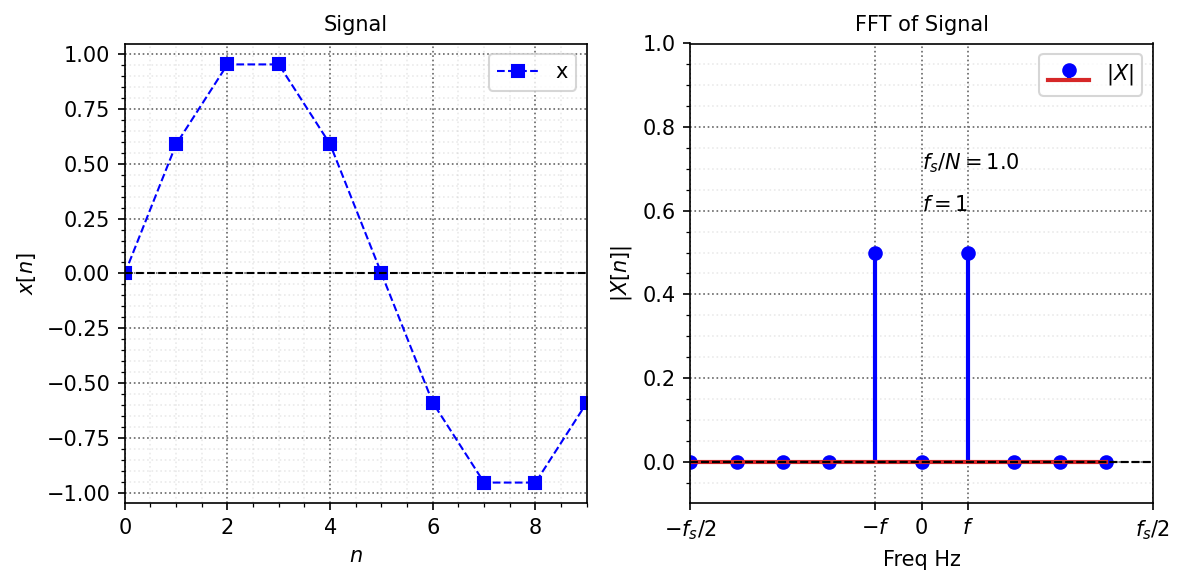

In [83]:
fs = 10; # samping freq
f = 1
Tf = 1
t,x,X = dft1_plot(f,fs,Tf,'./figs/T8_ex7_1.png')

     t         x      Xmag
0  0.0  0.000000  1.962611
1  0.1  0.809017  3.656876
2  0.2  0.951057  2.902113
3  0.3  0.309017  0.902113
4  0.4 -0.587785  0.579192
5  0.5 -1.000000  0.509525
6  0.6 -0.587785  0.579192
7  0.7  0.309017  0.902113
8  0.8  0.951057  2.902113
9  0.9  0.809017  3.656876


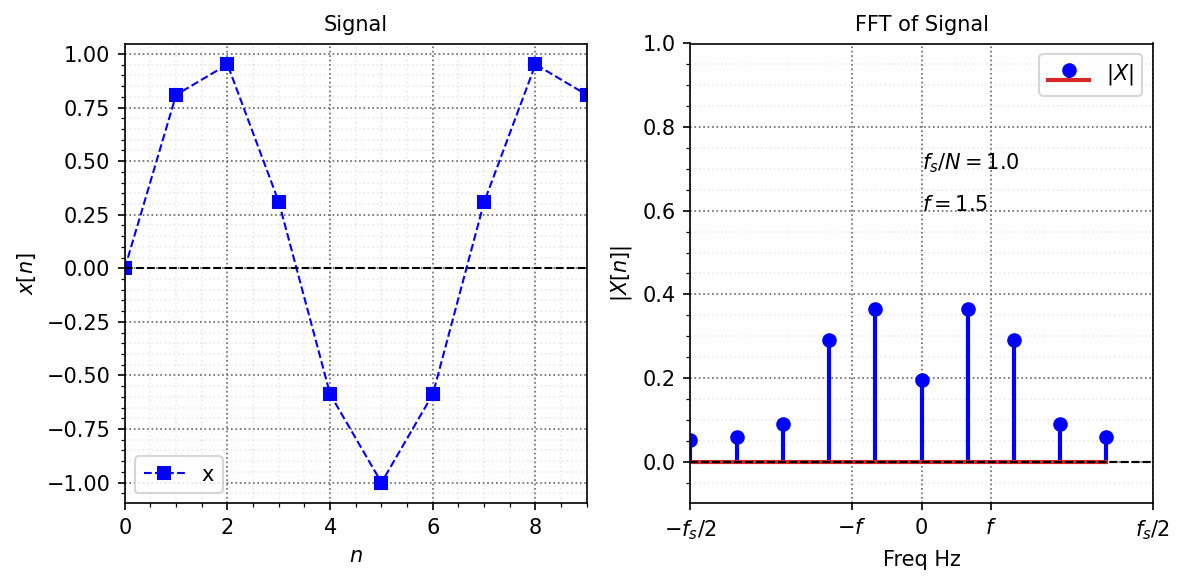

In [84]:
fs = 10 # samping freq
f = 1.5
Tf = 1
t,x,X = dft1_plot(f,fs,Tf,'./figs/T8_ex7_2.png')

      t         x          Xmag
0   0.0  0.000000  5.440093e-15
1   0.1  0.809017  1.439769e-14
2   0.2  0.951057  2.719523e-14
3   0.3  0.309017  2.782211e-15
4   0.4 -0.587785  5.175354e-15
..  ...       ...           ...
95  9.5  1.000000  3.682797e-13
96  9.6  0.587785  3.526825e-13
97  9.7 -0.309017  3.227511e-13
98  9.8 -0.951057  4.456070e-13
99  9.9 -0.809017  3.740446e-13

[100 rows x 3 columns]


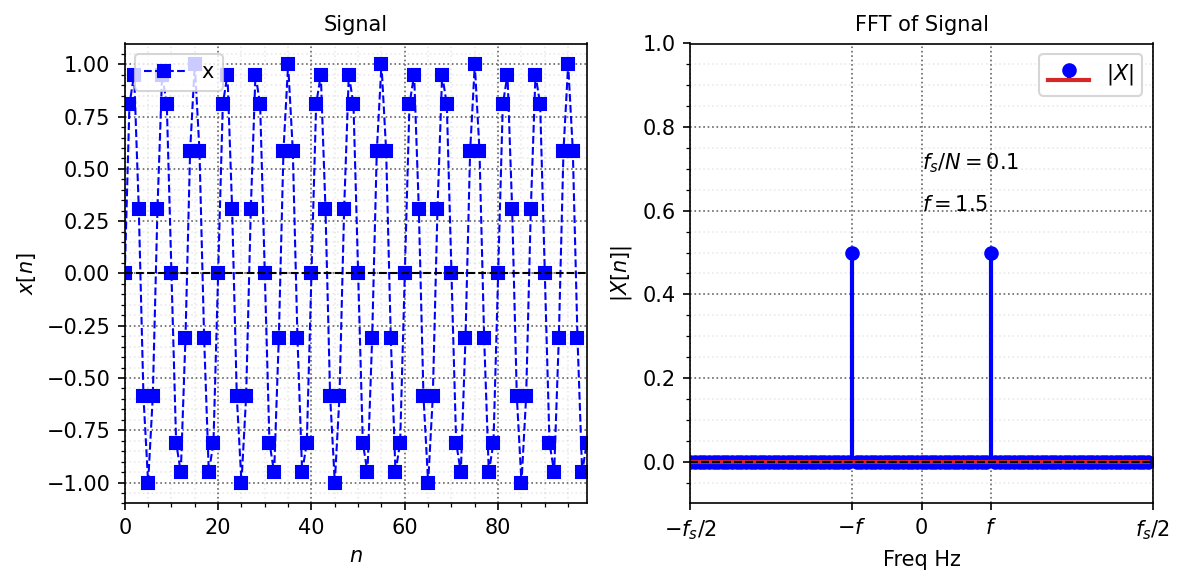

In [85]:
fs = 10 # samping freq
f = 1.5
Tf = 10
t,x,X = dft1_plot(f,fs,Tf,'./figs/T8_ex7_2l.png')

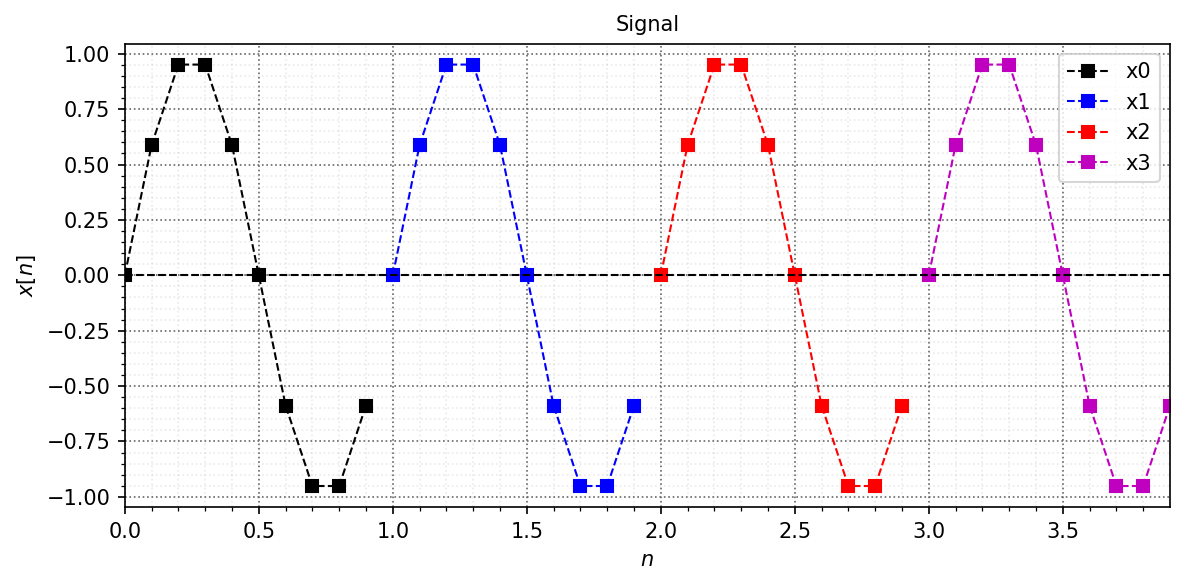

In [86]:
fs = 10; # samping freq
f = 1;
Nrep = 4
t,x = dft2_plot(f,fs,Nrep,'./figs/T8_ex7_3.png')

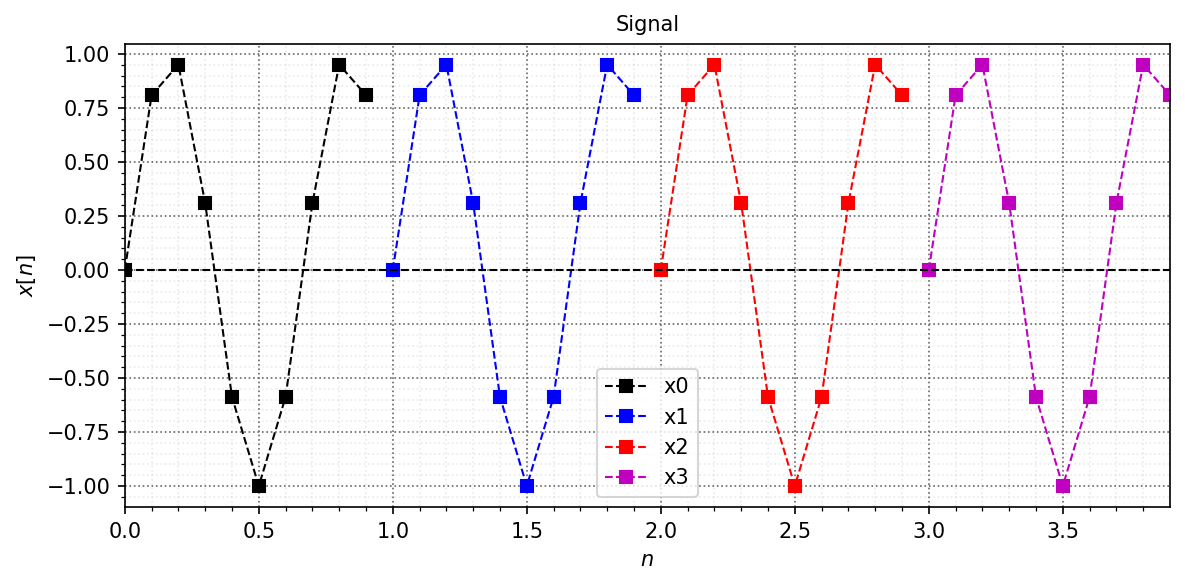

In [87]:
fs = 10 # samping freq
f = 1.5
Nrep = 4
t,x = dft2_plot(f,fs,Nrep,'./figs/T8_ex7_4.png')

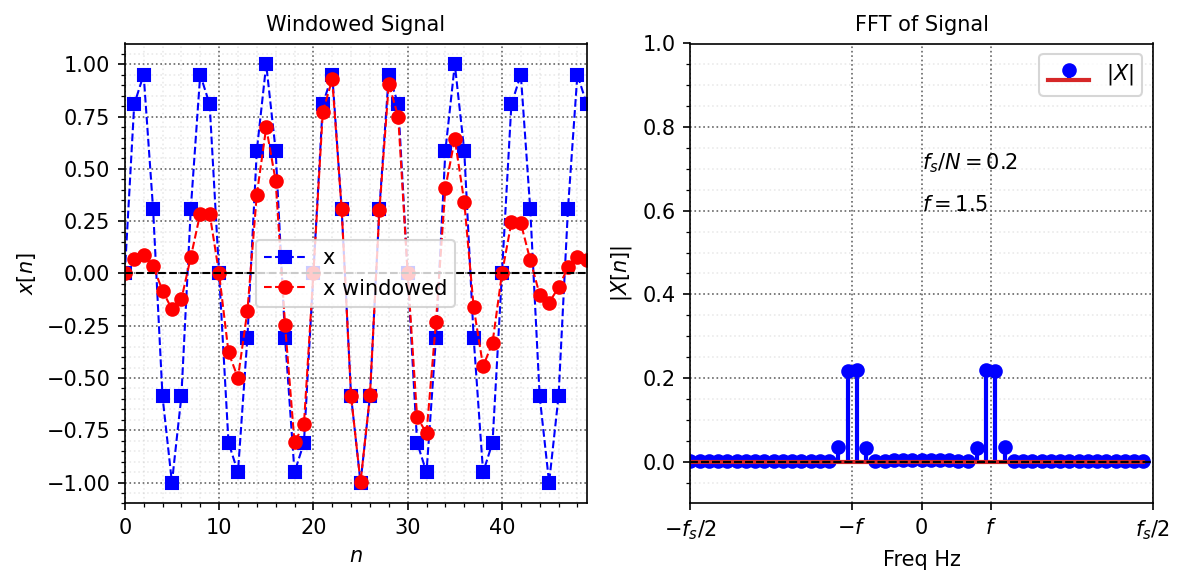

In [88]:
fs = 10 # samping freq
f = 1.5
Tf = 5
t,x,X = dft3_plot(f,fs,Tf,'./figs/T8_ex7_5.png')